In [1]:
import numpy as np
import torch
import torch.nn as nn
import os

from PIL import Image, ImageOps
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

from make_gif_from_folder import make_gif

path_to_image = 'imgs/x.bmp'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.cuda.set_device(0)
print(device)


cuda:0


In [15]:
filename = './data/sn1996k1904eng.abz'
with open(filename) as f:
    lines = [line.rstrip() for line in f]
my_shape = [int(x) for x in lines[0].split()[-6:-4]]
my_shape.reverse()
img_array = np.full(shape=my_shape, fill_value=255)
for line in lines[3:]:
    line = [int(x) for x in line.split()]
    if len(line) == 3:
        y = line[0]
        x1 = line[1]
        x2 = -line[2]
        for i in range(x1, x2 + 1):
            img_array[min(y, my_shape[0] - 1), min(i, my_shape[1] - 1)] = 0
    elif len(line) == 5:
        y = line[0]
        x1 = line[1]
        x2 = -line[2]
        x3 = line[3]
        x4 = -line[4]
        for i in range(x1, x2 + 1):
            img_array[min(y, my_shape[0] - 1), min(i, my_shape[1] - 1)] = 0
        for i in range(x3, x4 + 1):
            img_array[min(y, my_shape[0] - 1), min(i, my_shape[1] - 1)] = 0

filename = './data/CL_23.txt'


with open(filename) as f:
    lines = [line.rstrip() for line in f]
i = 10
for line in lines[2:38]:
    line = [int(x) for x in line.split()]
    for el in line[1:]:
        img_array[int((el)*639./180.), int(i * 1277. / 360.)] = 0
    i += 10

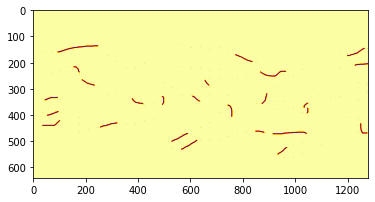

In [16]:
plt.imshow(img_array, cmap='inferno')